In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# Overview of Dataset

In [5]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Test set does not have the target feature count as well as the casual and registered columns, which represent whether the person who borrowed bike is registered user or not. 

In [8]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (10886, 12)
Test shape: (6493, 9)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# Data Manipulation

In [11]:
train['season'] = train['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

Changed season column so that it is understandable better.

And I did the same thing for weather column below.

In [12]:
train['weather'] = train['weather'].map({1:'clear', 2:'cloudy', 3:'drizzle', 4:'rainstorm'})

In [13]:
test['season'] = test['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
test['weather'] = test['weather'].map({1:'clear', 2:'cloudy', 3:'drizzle', 4:'rainstorm'})

In [14]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

I converted datetime column from string to datetime type so we can retrieve more information from it such as month and day to do more analysis.

In [15]:
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

# Data Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### Count for season, holiday, workingday, and weather

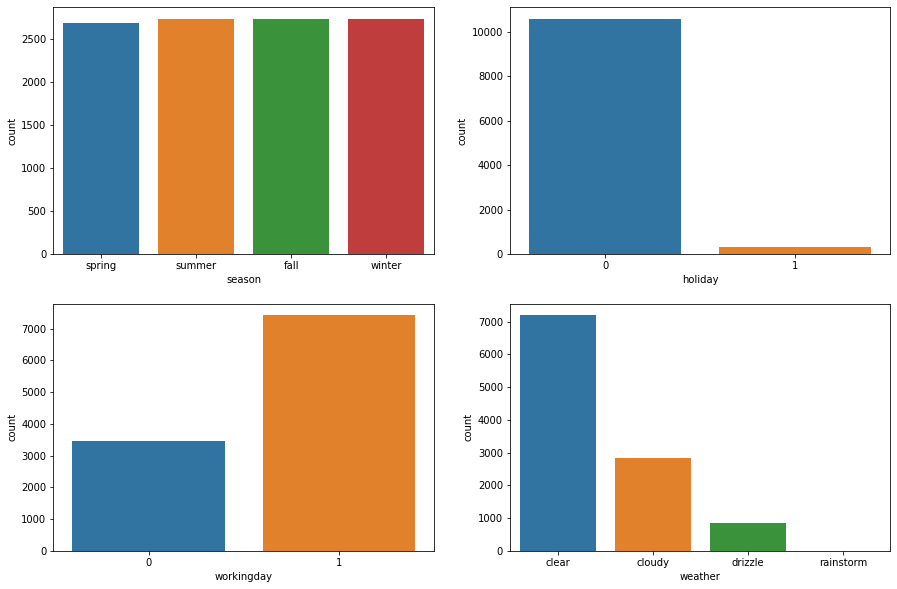

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='season', data=train, ax=ax[0,0]);
sns.countplot(x='holiday', data=train, ax=ax[0,1]);
sns.countplot(x='workingday', data=train, ax=ax[1,0]);
sns.countplot(x='weather', data=train, ax=ax[1,1]);

### Distribution of temp, atemp, humidity, and windspeed

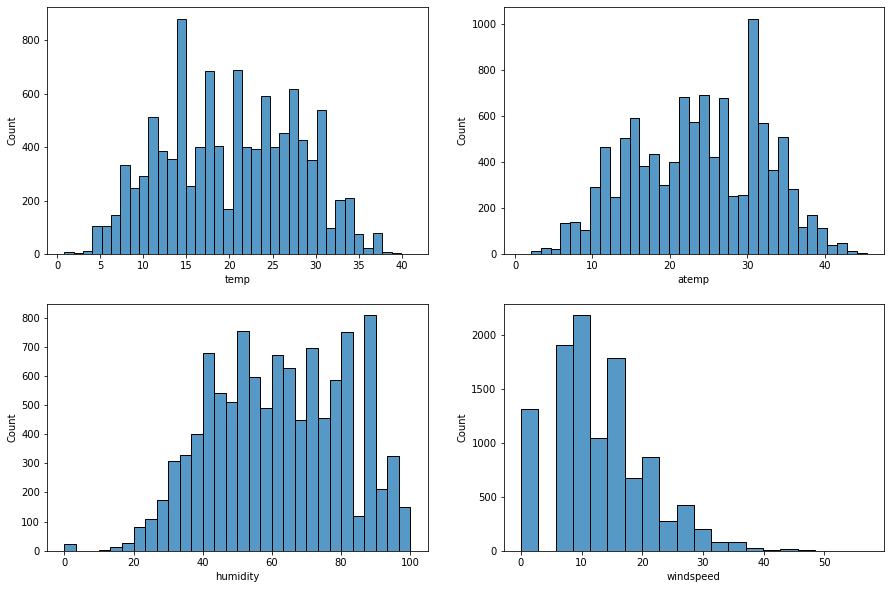

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(train['temp'], ax=ax[0,0]);
sns.histplot(train['atemp'], ax=ax[0,1]);
sns.histplot(train['humidity'], ax=ax[1,0], bins=30);
sns.histplot(train['windspeed'], ax=ax[1,1], bins=20);

### Distribution for number of rented bikes

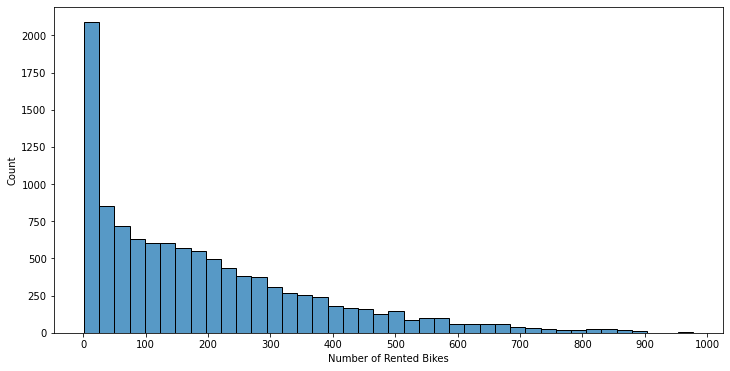

In [19]:
plt.figure(figsize=(12,6));

sns.histplot(train['count'], bins=40);
plt.xticks(range(0, 1001, 100));
plt.xlabel('Number of Rented Bikes');

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


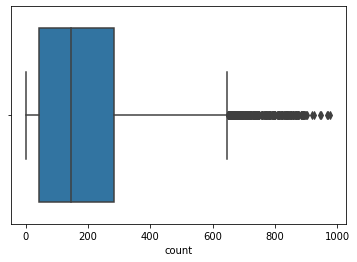

In [51]:
sns.boxplot(data=train, x='count', orient='v');

### Box plots for count in different features

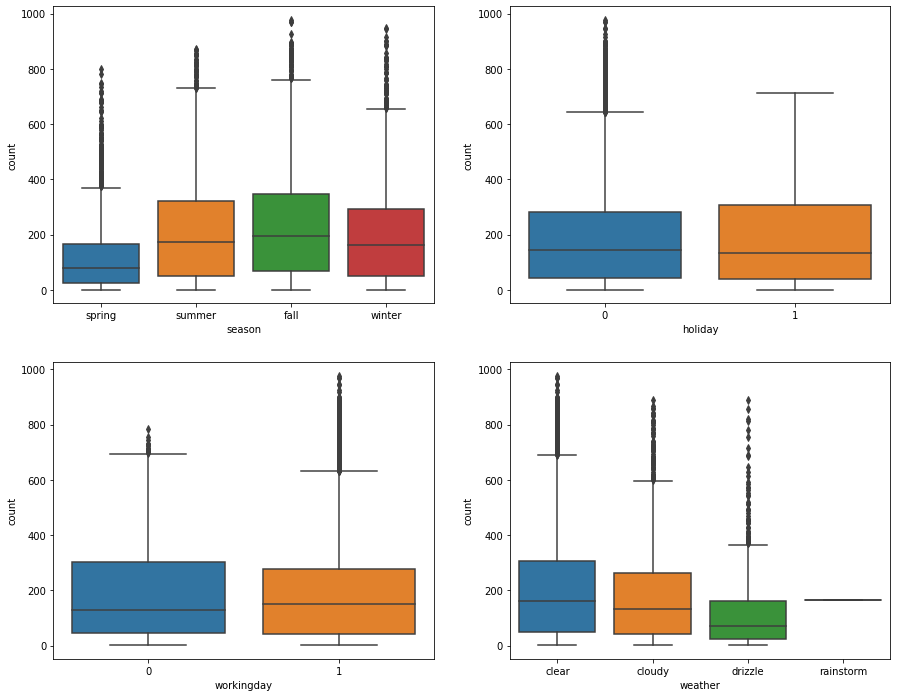

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(data=train, y='count', x='season', orient='v', ax=ax[0,0]);
sns.boxplot(data=train, y='count', x='holiday', orient='v', ax=ax[0,1]);
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=ax[1,0]);
sns.boxplot(data=train, y='count', x='weather', orient='v', ax=ax[1,1]);

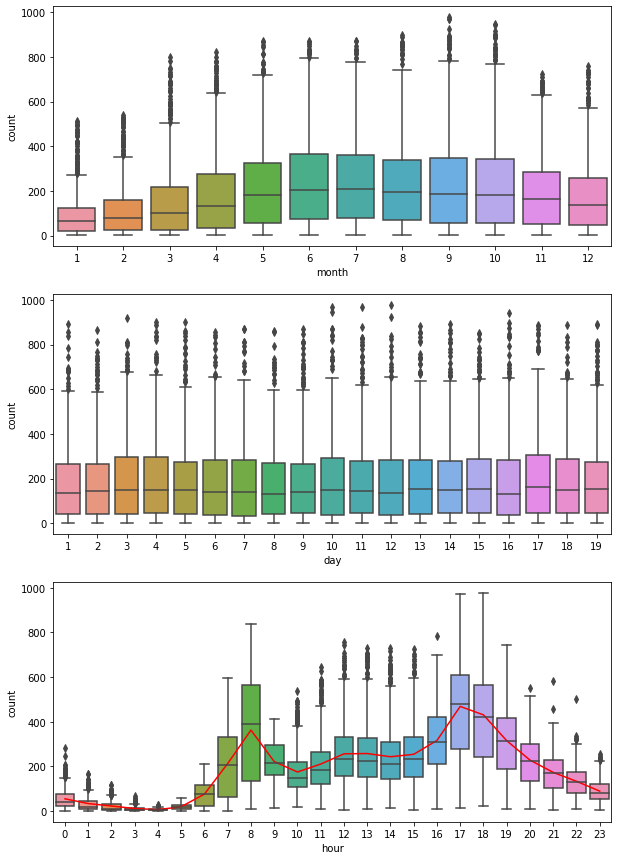

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(data=train, y='count', x='month', orient='v', ax=ax[0]);
sns.boxplot(data=train, y='count', x='day', orient='v', ax=ax[1]);
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=ax[2]);
sns.lineplot(data=train, y=train.groupby(['hour'])['count'].mean(), x='hour', ax=ax[2], color='r');

### Changes of count across time

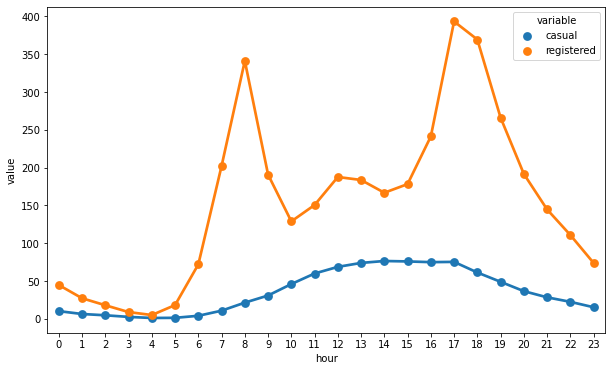

In [23]:
hour_transformed = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hour_aggregated = hour_transformed.groupby(['hour', 'variable']).mean('value').reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=hour_aggregated, y='value', x='hour', hue='variable');

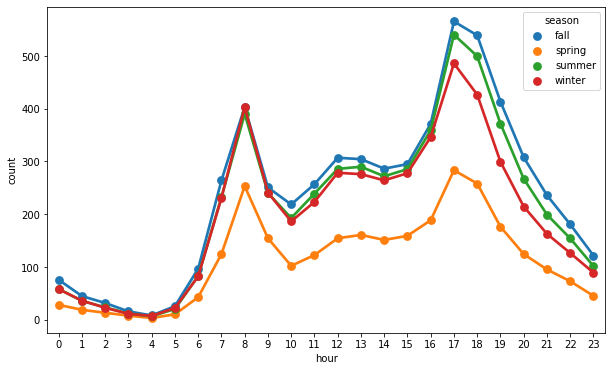

In [24]:
season_avg = pd.DataFrame(train.groupby(['hour', 'season'])['count'].mean()).reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=season_avg, x='hour', y='count', hue='season');

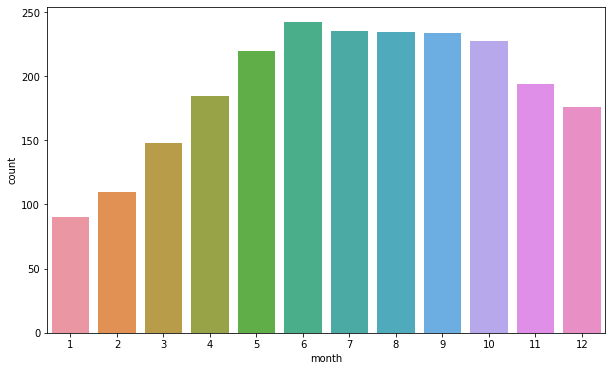

In [25]:
month_avg = pd.DataFrame(train.groupby(['month'])['count'].mean()).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=month_avg, x='month', y='count');

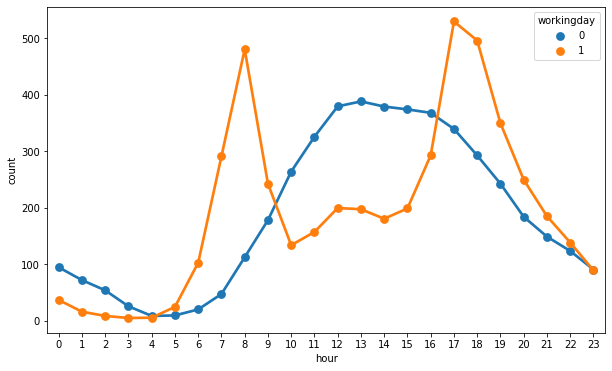

In [26]:
workday_avg = pd.DataFrame(train.groupby(['hour', 'workingday'])['count'].mean()).reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=workday_avg, x='hour', y='count', hue='workingday');

# Model Prediction

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1,1,1,4


In [30]:
# get rid of some unused columns
X = train.drop(['datetime', 'casual', 'registered', 'count', 'day'], axis=1)
y = train['count']
test_df = test.drop(['datetime', 'day'], axis=1)

I think it is a good idea to transform month and hour to categorical data and make dummy variables of them.

In [31]:
X['month'] = X['month'].astype('category')
X['hour'] = X['hour'].astype('category')
test_df['month'] = test_df['month'].astype('category')
test_df['hour'] = test_df['hour'].astype('category')
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour
0,spring,0,0,clear,9.84,14.395,81,0.0,1,0
1,spring,0,0,clear,9.02,13.635,80,0.0,1,1
2,spring,0,0,clear,9.02,13.635,80,0.0,1,2
3,spring,0,0,clear,9.84,14.395,75,0.0,1,3
4,spring,0,0,clear,9.84,14.395,75,0.0,1,4


In [32]:
X = pd.get_dummies(X, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)
X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,weather_cloudy,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,14.395,81,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y_log = np.log1p(y)

I made y in logarithm so it is more center.

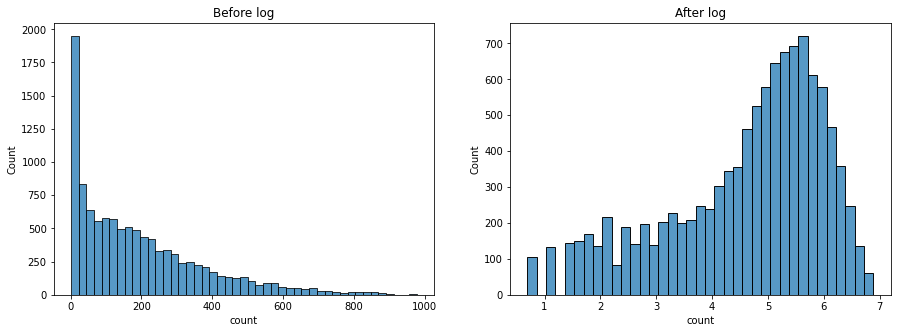

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15,5));

sns.histplot(y, ax=ax[0]);
ax[0].set_title('Before log');

sns.histplot(y_log, ax=ax[1]);
ax[1].set_title('After log');

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.3, random_state=87)

In [35]:
from sklearn.metrics import mean_squared_log_error

def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df)

### Linear Regression

In [37]:
lr = LinearRegression().fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

train_score = RMSLE(np.exp(train_pred), np.exp(y_train))
val_score = RMSLE(np.exp(val_pred).reshape(-1,1), np.exp(y_val))

print('Train score:', train_score)
print('validation score:', val_score)

Train score: 0.602125785202546
validation score: 0.6119470706625774


### Random Forest

In [38]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [20, 40, 60, 80],
          'n_estimators': [200, 400, 600]}

clf = GridSearchCV(RandomForestRegressor(random_state=87), params, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.3min finished


GridSearchCV(estimator=RandomForestRegressor(random_state=87), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 60, 80],
                         'n_estimators': [200, 400, 600]},
             verbose=1)

In [39]:
clf.best_params_

{'max_depth': 40, 'n_estimators': 600}

In [40]:
rf = RandomForestRegressor(max_depth=40, n_estimators=600, random_state=87).fit(X_train, y_train)

train_pred = rf.predict(X_train)
val_pred = rf.predict(X_val)

train_score = RMSLE(np.exp(train_pred), np.exp(y_train))
val_score = RMSLE(np.exp(val_pred), np.exp(y_val))

print('Train score:', train_score)
print('validation score:', val_score)

Train score: 0.16965784220215174
validation score: 0.4468445538619266


### Dense Layers

In [41]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

In [42]:
i = Input(shape=(X_train.shape[1],))
x = Dense(1024, activation='relu')(i)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs=i, outputs=x)

In [43]:
from tensorflow.keras.optimizers import Adam

In [44]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
239/239 [==============================] - 2s 4ms/step - loss: 3.2171 - val_loss: 1.9021
Epoch 2/50
239/239 [==============================] - 1s 3ms/step - loss: 0.8351 - val_loss: 0.9796
Epoch 3/50
239/239 [==============================] - 1s 3ms/step - loss: 0.5847 - val_loss: 0.6877
Epoch 4/50
239/239 [==============================] - 1s 3ms/step - loss: 0.5053 - val_loss: 0.4655
Epoch 5/50
239/239 [==============================] - 1s 3ms/step - loss: 0.4902 - val_loss: 0.4872
Epoch 6/50
239/239 [==============================] - 1s 3ms/step - loss: 0.4955 - val_loss: 0.4118
Epoch 7/50
239/239 [==============================] - 1s 3ms/step - loss: 0.4358 - val_loss: 0.3585
Epoch 8/50
239/239 [==============================] - 1s 3ms/step - loss: 0.3870 - val_loss: 0.5222
Epoch 9/50
239/239 [==============================] - 1s 3ms/step - loss: 0.3518 - val_loss: 0.2471
Epoch 10/50
239/239 [==============================] - 1s 3ms/step - loss: 0.2773 - val_loss: 0.2339

In [45]:
RMSLE(np.exp(model.predict(X_train).reshape(1, -1)[0]), np.exp(y_train))

0.33639141502086384

In [46]:
RMSLE(np.exp(model.predict(X_val).reshape(1, -1)[0]), np.exp(y_val))

0.37636808527522814

In [47]:
ann_pred = np.exp(model.predict(test_scaled).reshape(1,-1)[0])

In [48]:
test_datetime = test['datetime']

In [49]:
submission = pd.DataFrame({'datetime': test_datetime, 'count': ann_pred})

In [50]:
submission.to_csv('bike_ann_predictions.csv', index=False)